# Keypoint detection

In [ ]:
!pip install mediapipe

In [102]:
from google.colab import files
uploaded = files.upload()

Saving 33333.jpg to 33333.jpg


In [36]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

(1080, 1920, 3)

In [51]:
import mediapipe as mp
mp_pose = mp.solutions.pose

In [103]:
# Run MediaPipe Pose and draw pose landmarks.
landmark = [0, 2, 5, 7, 8, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 31, 32]
input_data = []
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name in uploaded.keys():
    image = cv2.imread(name) 
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
  # Print landmark.
  image_hight, image_width, _ = image.shape
  if not results.pose_landmarks:
    print("no search")
  else:
    for i in landmark:
      input_data.append(results.pose_landmarks.landmark[i].x * image_width)
      input_data.append(results.pose_landmarks.landmark[i].y * image_hight)


In [57]:
image.shape

(1080, 1920, 3)

In [104]:
for i in range(0, len(input_data), 2):
  print(input_data[i], input_data[i+1])

1152.7606201171875 518.5518765449524
1161.686668395996 508.66347312927246
1162.8426361083984 509.4396507740021
1158.1133651733398 488.2856798171997
1160.203857421875 491.09652757644653
1081.406478881836 466.06578826904297
1121.5967559814453 484.8995625972748
978.0807495117188 491.2946355342865
1055.2729797363281 521.9688606262207
978.5017776489258 580.0865578651428
1028.9204406738281 595.1692199707031
996.6918182373047 614.4235754013062
989.3954086303711 629.6886706352234
1099.4887161254883 678.6728668212891
909.6304893493652 738.8331198692322
1129.442367553711 803.4177947044373
783.9424896240234 820.4488348960876
1180.6196594238281 824.1444253921509
816.1723709106445 865.2388715744019


# pose estimation

In [107]:
import os
import json
import numpy as np
import pandas as pd

data_true = pd.read_csv("tr`ue_data_new.csv")
data_false = pd.read_csv("false_data_new.csv")

label_true = []
label_false = []
for i in range(len(data_true)) :
    label_true.append(1)
for i in range(len(data_false)) :
    label_false.append(0)
    
data = np.concatenate((data_true, data_false), axis=0)
label = np.array(label_true + label_false)
data = np.delete(data, (0), axis=1)
len(data)

17760

In [108]:

from sklearn.model_selection import train_test_split

data = data.astype(int)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1231)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(14208, 38)
(14208,)
(3552, 38)


In [109]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(256, input_shape = (38,), activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               9984      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [110]:
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 15, validation_data=(X_test, y_test), verbose=1)

results = model.evaluate(X_test, y_test)
print('accuracy: ', results[1]*100)

Epoch 1/15
111/111 [==============================] - 2s 8ms/step - loss: 8.9261 - accuracy: 0.8791 - val_loss: 0.6527 - val_accuracy: 0.9096
Epoch 2/15
111/111 [==============================] - 1s 7ms/step - loss: 0.6434 - accuracy: 0.9042 - val_loss: 0.6121 - val_accuracy: 0.9096
Epoch 3/15
111/111 [==============================] - 1s 6ms/step - loss: 0.5996 - accuracy: 0.9043 - val_loss: 0.5763 - val_accuracy: 0.9096
Epoch 4/15
111/111 [==============================] - 1s 6ms/step - loss: 0.5685 - accuracy: 0.9043 - val_loss: 0.5445 - val_accuracy: 0.9096
Epoch 5/15
111/111 [==============================] - 1s 6ms/step - loss: 0.5350 - accuracy: 0.9043 - val_loss: 0.5162 - val_accuracy: 0.9096
Epoch 6/15
111/111 [==============================] - 1s 6ms/step - loss: 0.5066 - accuracy: 0.9043 - val_loss: 0.4911 - val_accuracy: 0.9096
Epoch 7/15
111/111 [==============================] - 1s 6ms/step - loss: 0.4877 - accuracy: 0.9043 - val_loss: 0.4687 - val_accuracy: 0.9096
Epoch 

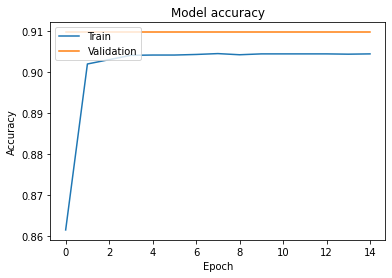

In [84]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 추출한 keypoint를 이용하여 자세 예측

In [111]:
test_data = np.array(input_data) # input_data는 위 이미지에서 뽑은 keypoint
test_data = test_data.reshape(1, 38)
predict = model(test_data)
pre = np.where(predict[0] > 0.5, 1, 0)
if pre[0] == 1:
  print("올바른 자세")
else:
  print("올바르지 못한 자세")

올바르지 못한 자세


In [96]:
len(input_data)

38

In [112]:
predict

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.21729088]], dtype=float32)>